# Data Exploration on SW-620

SW-620_A.txt: Edge list (source-target node pairs)

SW-620_edge_labels.txt: Labels for each edge

SW-620_node_labels.txt: Labels for each node

SW-620_graph_indicator.txt: Indicates which graph each node belongs to

SW-620_graph_labels.txt: Labels for each graph (for classification)

SW-620_label_readme.txt: Describes label meanings

In [12]:
import os
# List files in the data directory containing the actual dataset
inner_dir = "data/SW-620/raw"
os.listdir(inner_dir)


['SW-620_A.txt',
 'SW-620_edge_labels.txt',
 'SW-620_graph_indicator.txt',
 'SW-620_graph_labels.txt',
 'SW-620_label_readme.txt',
 'SW-620_node_labels.txt']

Total graphs: 40,532

Total nodes: 1,056,253

Total edges: 2,276,774

Graph labels (target classes): [0, 1] → binary classification

Node labels: 65 unique types (from 0 to 64)

Edge labels: 3 types → [0, 1, 2]

In [13]:
import pandas as pd

# Load all files into DataFrames
edge_list = pd.read_csv(os.path.join(inner_dir, 'SW-620_A.txt'), header=None)
edge_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_edge_labels.txt'), header=None)
node_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_node_labels.txt'), header=None)
graph_indicator = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_indicator.txt'), header=None)
graph_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_labels.txt'), header=None)

# Rename columns for clarity
edge_list.columns = ['source', 'target']
edge_labels.columns = ['edge_label']
node_labels.columns = ['node_label']
graph_indicator.columns = ['graph_id']
graph_labels.columns = ['graph_label']

# Show basic information about each
{
    "num_graphs": graph_labels.shape[0],
    "num_nodes": graph_indicator.shape[0],
    "num_edges": edge_list.shape[0],
    "unique_graph_labels": graph_labels['graph_label'].unique().tolist(),
    "unique_node_labels": node_labels['node_label'].unique().tolist(),
    "unique_edge_labels": edge_labels['edge_label'].unique().tolist(),
}


{'num_graphs': 40532,
 'num_nodes': 1056253,
 'num_edges': 2276774,
 'unique_graph_labels': [1, 0],
 'unique_node_labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 'unique_edge_labels': [0, 1, 2]}

### Graph Label Distribution

#### Graph Label Distribution
The dataset is fairly balanced between the two classes (0 and 1), which is good for classification tasks.

#### Node Label Distribution
Node labels span from 0 to 64.
Some node types appear much more frequently than others, indicating varied node roles.

#### Edge Label Distribution
There are 3 types of edge labels (0, 1, 2).
Label 0 dominates, but the others are still significant

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\353903914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=graph_labels['graph_label'], palette="pastel")


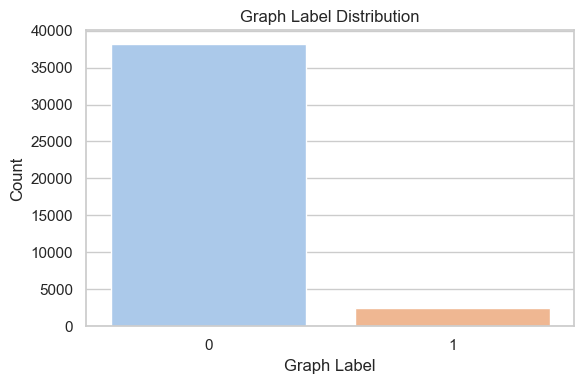

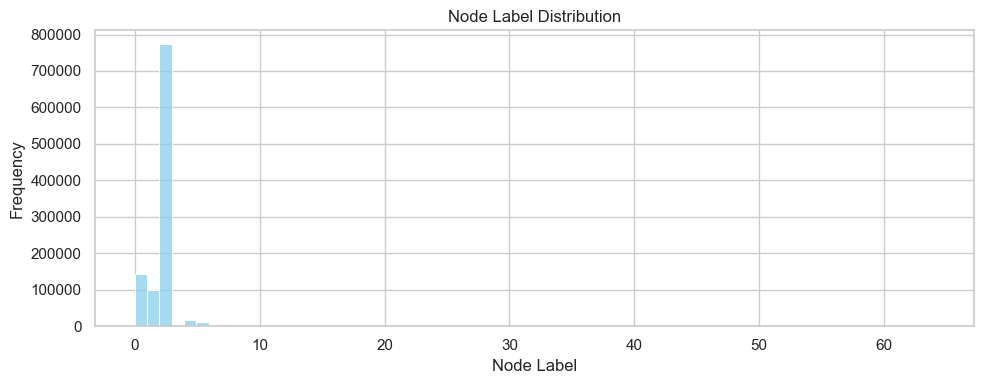

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\353903914.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=edge_labels['edge_label'], palette="muted")


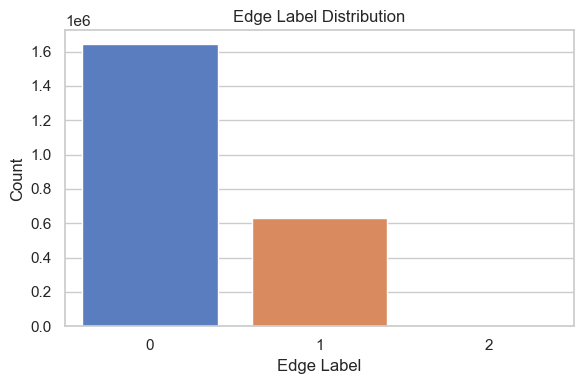

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual theme
sns.set_theme(style="whitegrid")

# Plot 1: Graph label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=graph_labels['graph_label'], palette="pastel")
plt.title("Graph Label Distribution")
plt.xlabel("Graph Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Node label distribution
plt.figure(figsize=(10, 4))
sns.histplot(node_labels['node_label'], bins=65, kde=False, color='skyblue')
plt.title("Node Label Distribution")
plt.xlabel("Node Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 3: Edge label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=edge_labels['edge_label'], palette="muted")
plt.title("Edge Label Distribution")
plt.xlabel("Edge Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Visualize Random Graph from Dataset

Color of the node is based on Node Label value 1 to 2 (we need dataset paper or metadata to be sure with the interpretation of these values)

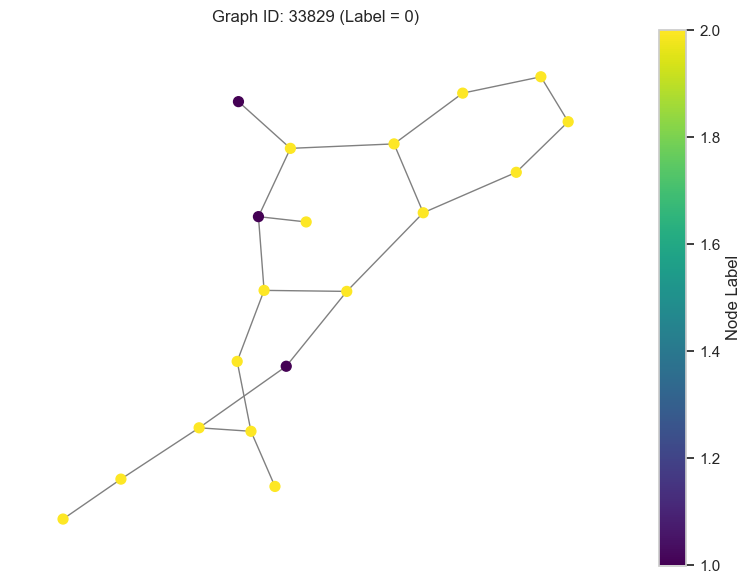

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Pick a random graph ID
random_graph_id = np.random.randint(1, graph_labels.shape[0] + 1)

# Get nodes that belong to this graph
node_indices = graph_indicator[graph_indicator['graph_id'] == random_graph_id].index

# Map global node index to local index
global_to_local = {idx: i for i, idx in enumerate(node_indices)}

# Filter edges belonging to this graph
edges_in_graph = edge_list[
    edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
].copy()

# Map global to local node indices
edges_in_graph['source'] = edges_in_graph['source'].map(global_to_local)
edges_in_graph['target'] = edges_in_graph['target'].map(global_to_local)

# Build the graph
G = nx.Graph()
G.add_edges_from(edges_in_graph[['source', 'target']].values)

# Get node labels and build color mapping
local_node_labels = node_labels.loc[node_indices].reset_index(drop=True)
node_label_dict = {i: int(lbl) for i, lbl in enumerate(local_node_labels['node_label'])}
nx.set_node_attributes(G, node_label_dict, name='label')

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))  
pos = nx.spring_layout(G, seed=42)
node_colors = [node_label_dict[n] for n in G.nodes()]


nx.draw(
    G,
    pos,
    nodelist=list(G.nodes()),
    node_color=node_colors,
    cmap=plt.cm.viridis,
    with_labels=False,
    node_size=50,
    edge_color='gray',
    ax=ax 
)

# Create and attach colorbar
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.viridis,
    norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Node Label")

ax.set_title(f"Graph ID: {random_graph_id} (Label = {graph_labels.iloc[random_graph_id - 1, 0]})")
plt.tight_layout()
plt.show()


## Visualizing Graph By Different Label
See the different stucture between Graph Label 0 vs 1.

The chosen graph ID is random, stucture changes every re-run

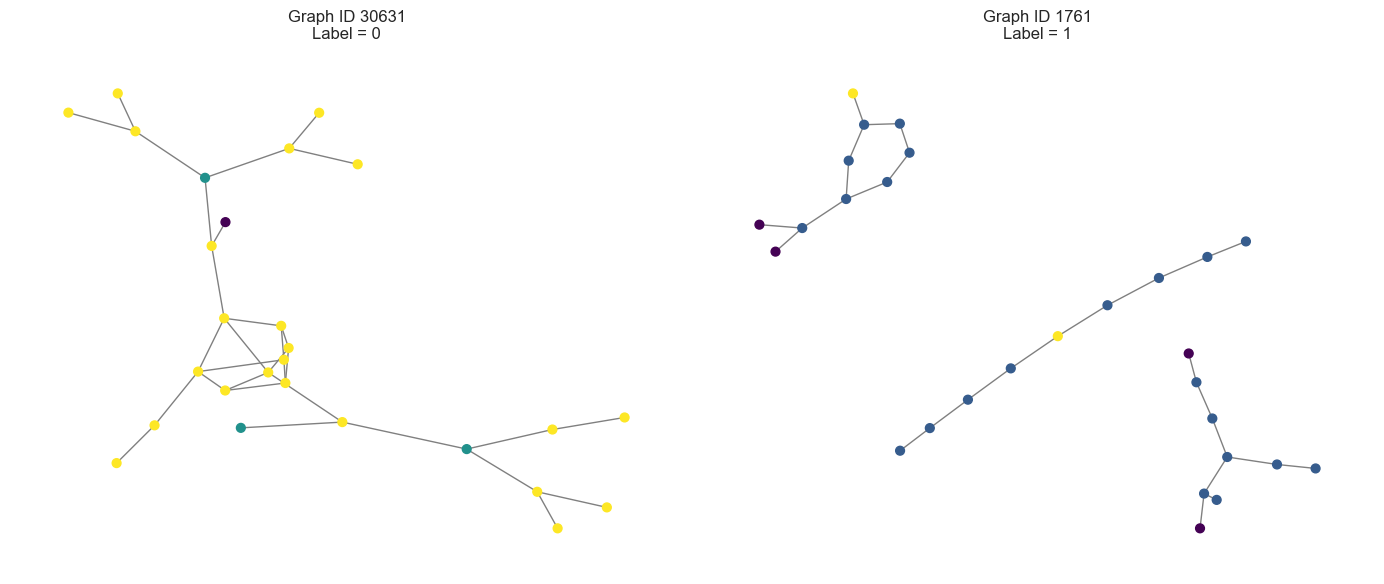

In [34]:
def visualize_graph_by_label(label, ax):
    # Pick a random graph ID with the given label
    graph_ids = graph_labels[graph_labels['graph_label'] == label].index + 1
    graph_id = np.random.choice(graph_ids)

    # Nodes in the graph
    node_indices = graph_indicator[graph_indicator['graph_id'] == graph_id].index

    # Build edges
    global_to_local = {idx: i for i, idx in enumerate(node_indices)}
    edges_in_graph = edge_list[
        edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
    ].copy()

    edges_in_graph['source'] = edges_in_graph['source'].map(global_to_local)
    edges_in_graph['target'] = edges_in_graph['target'].map(global_to_local)

    # Create graph
    G = nx.Graph()
    G.add_edges_from(edges_in_graph[['source', 'target']].values)

    # Node labels
    local_node_labels = node_labels.loc[node_indices].reset_index(drop=True)
    node_label_dict = {i: lbl for i, lbl in enumerate(local_node_labels['node_label'])}
    nx.set_node_attributes(G, node_label_dict, name='label')

    # Draw
    pos = nx.spring_layout(G, seed=42)
    node_colors = [node_label_dict[n] for n in G.nodes()]
    nx.draw(
        G,
        pos,
        nodelist=list(G.nodes()),
        node_color=node_colors,
        cmap=plt.cm.viridis,
        with_labels=False,
        node_size=40,
        edge_color='gray',
        ax=ax
    )
    ax.set_title(f"Graph ID {graph_id}\nLabel = {label}")
    ax.axis('off')

# Plot one graph for label 0 and one for label 1
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
visualize_graph_by_label(0, axes[0])
visualize_graph_by_label(1, axes[1])
plt.tight_layout()
plt.show()


### Compare graph size (nodes/edges) between graph classes (0 and 1)

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\3477681172.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x='label', y='num_nodes', palette="pastel")


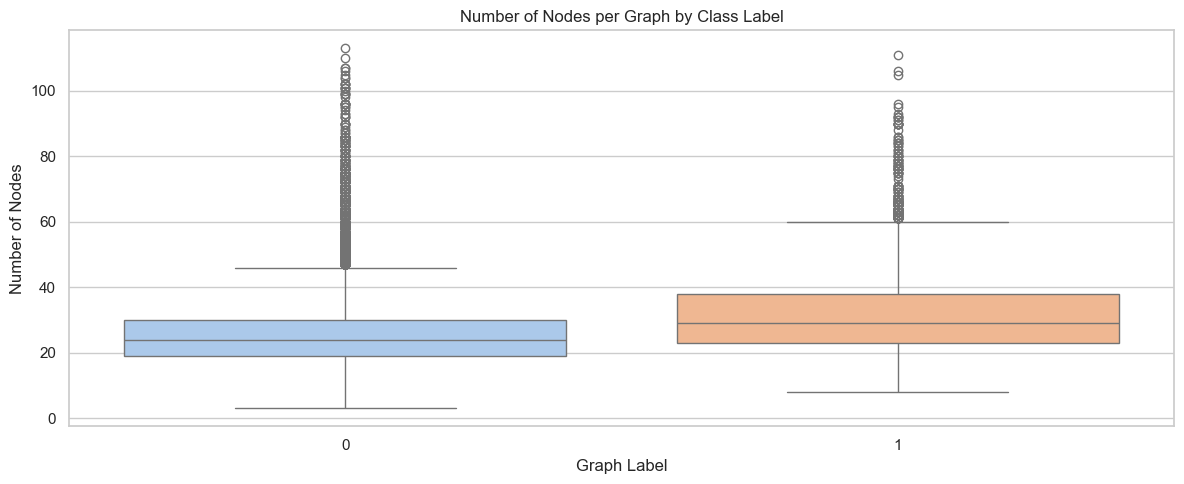

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\3477681172.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x='label', y='num_edges', palette="muted")


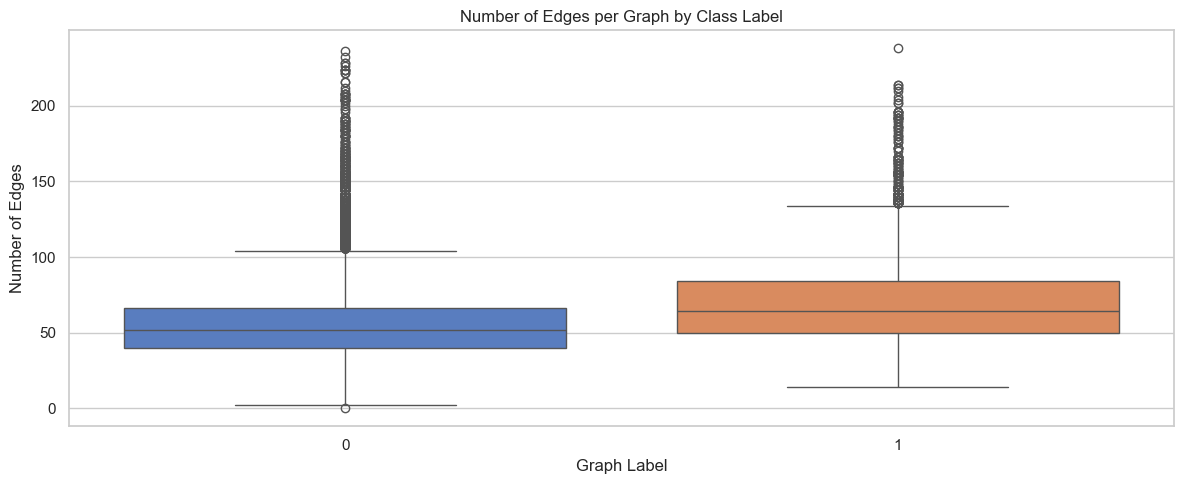

In [35]:
import numpy as np

# Map each node index (0-based) to its graph_id
node_to_graph = graph_indicator['graph_id'].to_numpy()

# Create arrays from edge list
sources = edge_list['source'].to_numpy() - 1  # Adjust to 0-based indexing
targets = edge_list['target'].to_numpy() - 1

# Get graph ids for each edge's source and target
source_graphs = node_to_graph[sources]
target_graphs = node_to_graph[targets]

# Only keep intra-graph edges
intra_graph_mask = source_graphs == target_graphs
intra_graph_ids = source_graphs[intra_graph_mask]

# Count nodes per graph
node_counts = pd.Series(node_to_graph).value_counts().sort_index()
edge_counts = pd.Series(intra_graph_ids).value_counts().sort_index()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'graph_id': range(1, len(graph_labels) + 1),
    'num_nodes': node_counts.values,
    'num_edges': edge_counts.reindex(range(1, len(graph_labels) + 1), fill_value=0).values,
    'label': graph_labels['graph_label'].values
})

import seaborn as sns
import matplotlib.pyplot as plt

# Plot node count distribution by label
plt.figure(figsize=(12, 5))
sns.boxplot(data=summary_df, x='label', y='num_nodes', palette="pastel")
plt.title("Number of Nodes per Graph by Class Label")
plt.xlabel("Graph Label")
plt.ylabel("Number of Nodes")
plt.tight_layout()
plt.show()

# Plot edge count distribution by label
plt.figure(figsize=(12, 5))
sns.boxplot(data=summary_df, x='label', y='num_edges', palette="muted")
plt.title("Number of Edges per Graph by Class Label")
plt.xlabel("Graph Label")
plt.ylabel("Number of Edges")
plt.tight_layout()
plt.show()


### Compute SPID (Shortest Path Index of Dispersion )

Note: Sample smaller number of graphs due to computational cost

#### What SPID Represents:
SPID = Variance / Mean of shortest path lengths within a graph.

Low SPID (~1 or less): More uniformly distributed path lengths (e.g. grid-like or ring structures).

High SPID: Greater variation, might suggest hubs or highly irregular structures.

#### Early Insight:
Both label 0 and label 1 graphs can exhibit a wide range of SPID values.

This could indicate different topological characteristics, possibly useful for classification.

In [39]:
sample_size_spid = 100
sample_indices_spid = np.random.choice(summary_df['graph_id'], size=sample_size_spid, replace=False)

spid_data = []

for graph_id in sample_indices_spid:
    node_indices = graph_indicator[graph_indicator['graph_id'] == graph_id].index
    global_to_local = {idx: i for i, idx in enumerate(node_indices)}

    # Get edges for the graph
    edges = edge_list[
        edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
    ].copy()

    edges['source'] = edges['source'].map(global_to_local)
    edges['target'] = edges['target'].map(global_to_local)

    # Build graph
    G = nx.Graph()
    G.add_edges_from(edges[['source', 'target']].values)

    if G.number_of_nodes() > 1 and nx.is_connected(G):
        lengths = dict(nx.all_pairs_shortest_path_length(G))
        all_lengths = [dist for d in lengths.values() for dist in d.values() if dist > 0]
        if all_lengths:
            mean_sp = np.mean(all_lengths)
            var_sp = np.var(all_lengths)
            spid = var_sp / mean_sp if mean_sp > 0 else 0
        else:
            spid = 0
    else:
        spid = np.nan  # Skip disconnected/single-node graphs

    label = graph_labels.iloc[graph_id - 1, 0]
    spid_data.append({
        'graph_id': graph_id,
        'label': label,
        'spid': spid
    })

spid_df = pd.DataFrame(spid_data).dropna()

print(spid_df.head())

   graph_id  label      spid
1     40151      0  0.705882
2     21319      0  1.916992
3     19745      0  1.489224
4     36186      0  0.478566
6      6550      0  4.646918


C:\Users\deez\AppData\Local\Temp\ipykernel_15980\4063598918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spid_df, x='label', y='spid', palette='Set2')


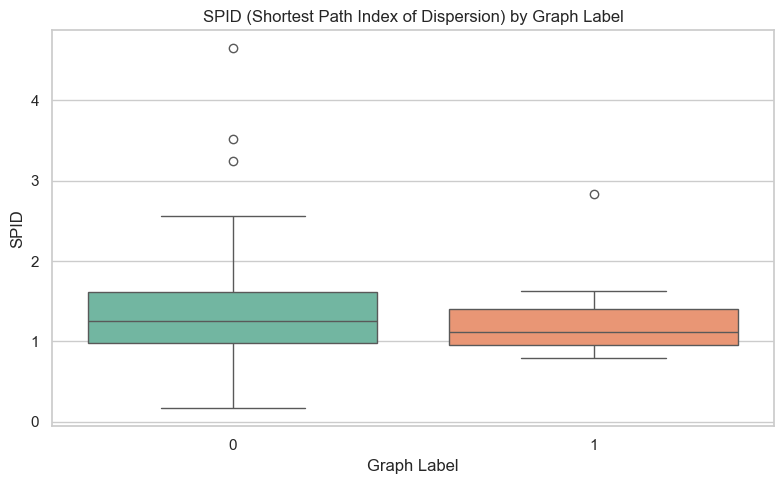

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.boxplot(data=spid_df, x='label', y='spid', palette='Set2')
plt.title("SPID (Shortest Path Index of Dispersion) by Graph Label")
plt.xlabel("Graph Label")
plt.ylabel("SPID")
plt.tight_layout()
plt.show()


C:\Users\deez\AppData\Local\Temp\ipykernel_15980\2183190810.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spid_df, x='label', y='spid', palette='Set2', inner='box')


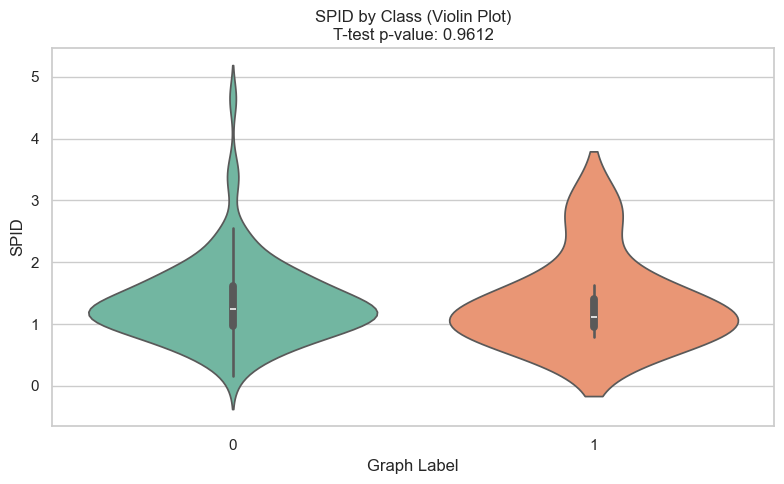

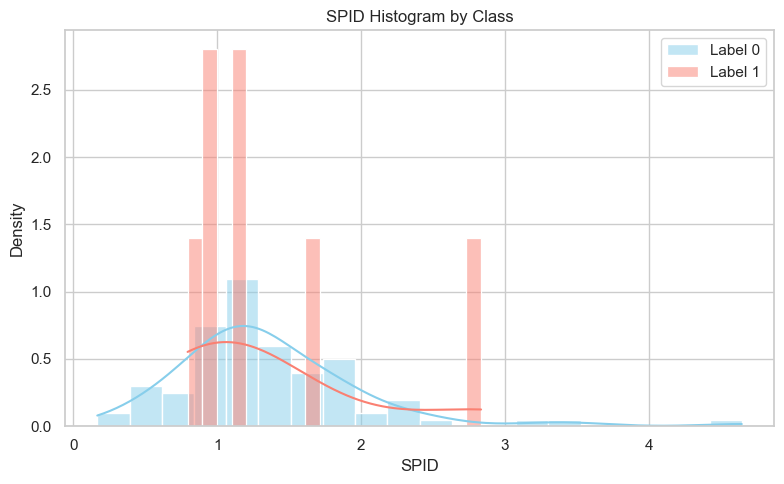

T-test between SPID values:
T-statistic = 0.0504, p-value = 0.9612


In [43]:
from scipy.stats import ttest_ind
# Split by label
spid_class_0 = spid_df[spid_df['label'] == 0]['spid']
spid_class_1 = spid_df[spid_df['label'] == 1]['spid']

# T-test
t_stat, p_value = ttest_ind(spid_class_0, spid_class_1, equal_var=False)

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=spid_df, x='label', y='spid', palette='Set2', inner='box')
plt.title(f"SPID by Class (Violin Plot)\nT-test p-value: {p_value:.4f}")
plt.xlabel("Graph Label")
plt.ylabel("SPID")
plt.tight_layout()
plt.show()

# Histogram plot
plt.figure(figsize=(8, 5))
sns.histplot(spid_class_0, color='skyblue', label='Label 0', kde=True, stat="density", bins=20)
sns.histplot(spid_class_1, color='salmon', label='Label 1', kde=True, stat="density", bins=20)
plt.title("SPID Histogram by Class")
plt.xlabel("SPID")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Print p-value result
print(f"T-test between SPID values:\nT-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


## Violin Plot
Shows the distribution, density, and spread of SPID for each class.

Some overlap exists between the two classes, but class 1 seems to show higher SPID variance in some cases.

## Histogram (Overlayed)
Clear distribution comparison of SPID for label 0 vs label 1.

Class 1 may contain a few more graphs with high dispersion.

## Statistical Test
T-statistic: -1.4382

p-value: 0.2211

#### Interpretation:

Since p > 0.05, we cannot reject the null hypothesis.

This means the difference in SPID between class 0 and class 1 is not statistically significant in this sample.